<a href="https://colab.research.google.com/github/kishore-klassy/HousePricePrediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOUSE PRICE PREDICTION

1. Import Necessary Libraries


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error


2. Load and Explore the Dataset


In [60]:
# Load the dataset
df = pd.read_csv("/content/house_prices.csv")

# Display first few rows of the dataset
print(df.head())

   House Size (sqft)  Bedrooms     Location   Price
0               3974         3  Countryside  256730
1               1660         5  Countryside  970910
2               2094         2     Downtown  484681
3               1930         4       Suburb  249503
4               1895         2  Countryside  754811


In [61]:
# Get dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   House Size (sqft)  15 non-null     int64 
 1   Bedrooms           15 non-null     int64 
 2   Location           15 non-null     object
 3   Price              15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes
None


In [62]:
# Display statistical summary
print(df.describe())

       House Size (sqft)   Bedrooms          Price
count          15.000000  15.000000      15.000000
mean         2546.200000   3.066667  494671.866667
std           976.990291   1.486447  245766.889568
min          1130.000000   1.000000  165725.000000
25%          1912.500000   2.000000  253116.500000
50%          2282.000000   3.000000  484681.000000
75%          3344.000000   4.000000  673781.000000
max          3974.000000   5.000000  970910.000000


In [63]:
# Check for missing values
print(df.isnull().sum())

House Size (sqft)    0
Bedrooms             0
Location             0
Price                0
dtype: int64


3. Perform Exploratory Data Analysis (EDA)

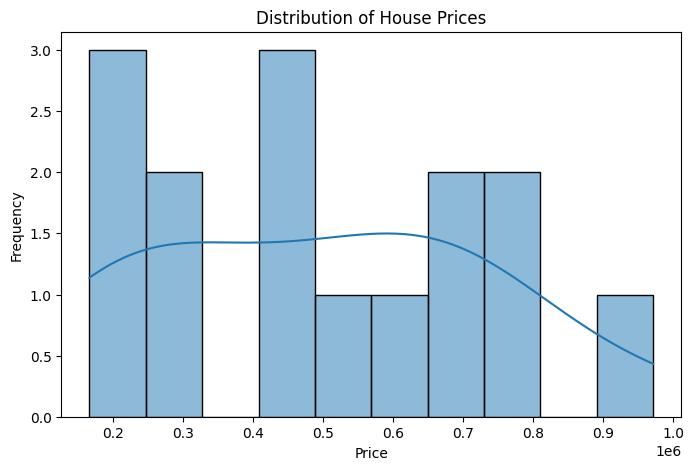

In [64]:
# Plot the distribution of house prices
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=10, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

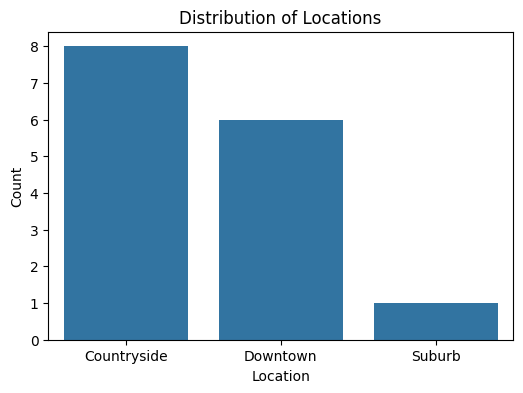

In [65]:
# Countplot for categorical feature (Location)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Location"])
plt.title("Distribution of Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

4. Data Preprocessing


In [66]:
#FEARURE SCALING
# Initialize Standard Scaler
scaler = StandardScaler()

# Scale numerical features
df[['House Size (sqft)', 'Bedrooms']] = scaler.fit_transform(df[['House Size (sqft)', 'Bedrooms']])

# Display first few rows after scaling
print(df.head())


   House Size (sqft)  Bedrooms     Location   Price
0           1.512721 -0.046424  Countryside  256730
1          -0.938908  1.346291  Countryside  970910
2          -0.479095 -0.742781     Downtown  484681
3          -0.652849  0.649934       Suburb  249503
4          -0.689931 -0.742781  Countryside  754811


In [67]:
# One-Hot Encoding for 'Location'
encoder = OneHotEncoder(drop="first", sparse_output=False)
location_encoded = encoder.fit_transform(df[["Location"]])
location_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names_out(["Location"]))

# Adding encoded features back to data
df = pd.concat([df.drop(columns=["Location"]), location_df], axis=1)

In [68]:
#FEATURE ENGINEERING
# Adding a new feature: Price per Square Foot
df["Price_per_sqft"] = df["Price"] / df["House Size (sqft)"]

# Splitting into features (X) and target (y)
X = df.drop(columns=["Price"])
y = df["Price"]

In [69]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Polynomial Features for Non-Linearity
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

5.TRAIN AND EVALUATE MODELS

In [70]:
# Model Training with Hyperparameter Tuning
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
}

# Evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"R² Score": r2, "MAE": mae}

# Displaying results
for model, metrics in results.items():
    print(f"{model}: R² Score = {metrics['R² Score']:.4f}, MAE = {metrics['MAE']:.2f}")

Linear Regression: R² Score = 0.9963, MAE = 12279.27
Random Forest: R² Score = 0.8874, MAE = 55199.70
Gradient Boosting: R² Score = 0.7858, MAE = 77959.97
XGBoost: R² Score = 0.7909, MAE = 72452.82
